

<h1 ><center><b>Bank Customer Churn Prediction</b></center></h1>

<h3><center><i> Predicting customer churn in banking industry using machine learning.</i></center></h3> 

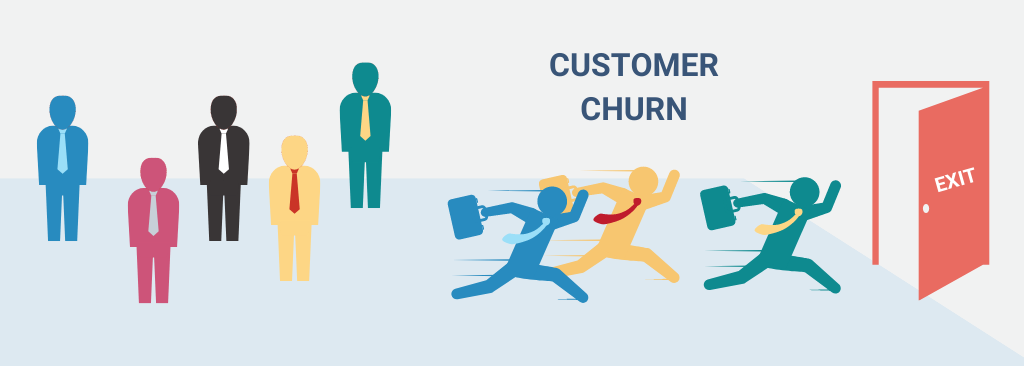

### Data Dictionary

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)

### Importing all the necessary libraries

In [2]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# for displaying all the columns
pd.set_option('display.max_columns',None)

# for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for model training and predicting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier

# for evaluating performance of models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

# for hyperparameter tuning
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV



### Loading the dataset

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Shape of the dataset

In [4]:
shape = df.shape
print(f'There are {shape[0]} rows and {shape[1]} columns in the dataset')

There are 10000 rows and 14 columns in the dataset


### Columns of the dataset

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Basic information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Out of 14 columns, 2 columns are of float, 9 columns are of integer and 3 columns are of object datatype.

### Unique number of values in each column

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Statistical summary of the dataset

In [9]:
# Statistical summary of the numeric columns

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Statistical summary of the object columns

df.describe(include="object")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457



 <h1><center><b><td>Exploratory Data Analysis</td></b></center></h1>


### Checking for duplicate observations

In [11]:
df.duplicated().sum()

0

In [12]:
# There are no duplicate observations in the dataset.

### Checking for missing values

In [13]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# There are no missing values in the dataset.

## Churn Rate Analysis

### Churn rate

In [15]:
rate = len(df[df['Exited']==1]) / len(df) * 100
print(f"Customer churn rate = {round(rate,2)} %")

Customer churn rate = 20.37 %


### Proportion of customer churned and retained

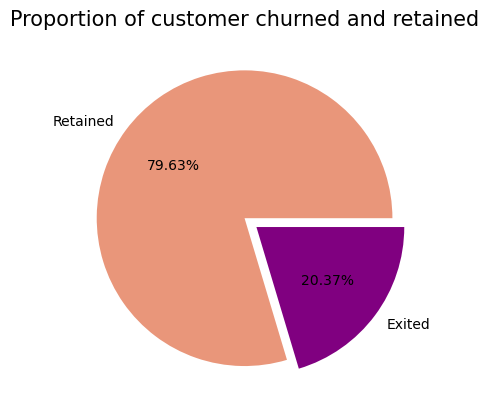

In [16]:
data = [df.Exited.value_counts()[0], df.Exited.value_counts()[1]]
keys = ["Retained", "Exited"]
explode = [0, 0.1]
palette_color = [ "darksalmon", "purple"]
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.2f%%')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

In [17]:
# As only 20.37% of the total customers have churned, it indicates a highly imbalanced dataset.

## Univariate Analysis

### Extracting categorical columns

In [18]:
cat_cols=[]
for i in df.columns:
    if df[i].nunique() <= 11:
        cat_cols.append(i)
cat_cols            

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

### Visualizing categorical columns

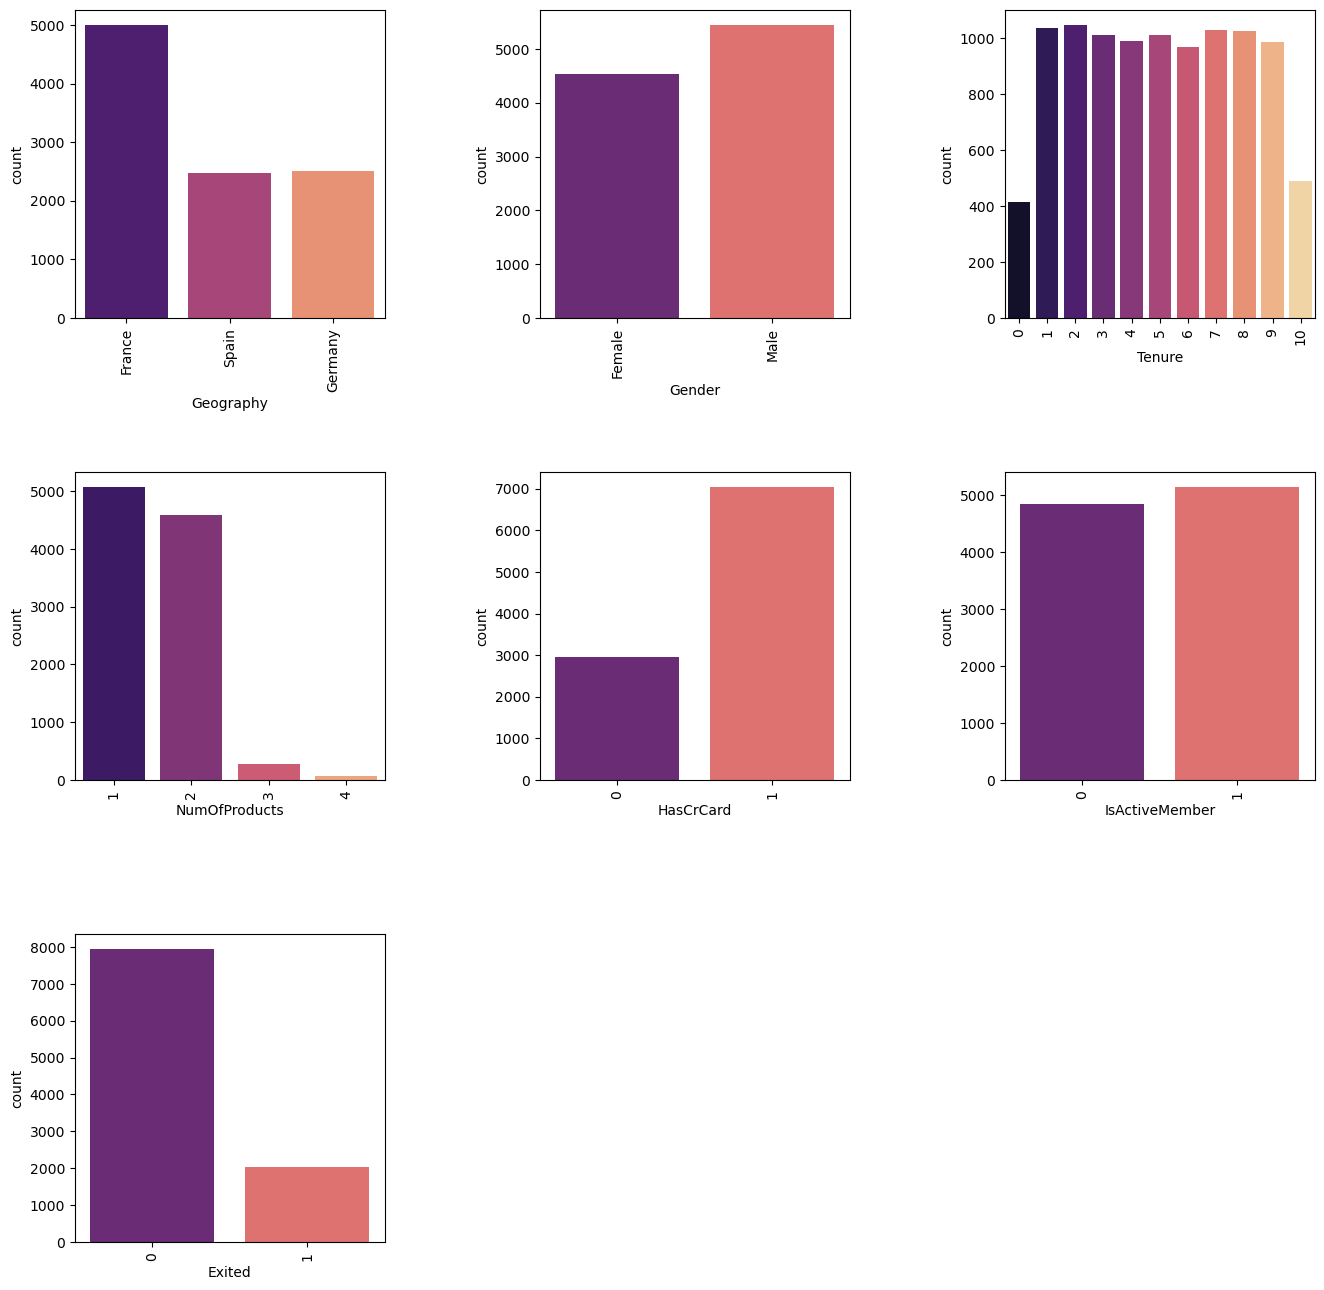

In [19]:
plt.figure(figsize = (16,16))
plt.subplots_adjust(hspace = 0.50, wspace = 0.50)

for i in range(len(cat_cols)):
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.countplot(df[cat_cols[i]], palette="magma")
    
plt.show()

##### Insights:
- Most of the customers belong to France, followed by Germany and Spain.
- Out of all the customers, males are more in number than females.
- The tenure of most of the customers lie within the range from 1 to 9.
- Most of the customers possess single product, followed by two products only.
- The customers having credit card are more in number than the ones not having a credit card.
- There is no significant difference in the number of active(though higher) and non-active members.
- The customers who churn are less in number.

### Extracting numerical columns

In [20]:
num_cols = []
for i in df.columns:
    if ((df[i].nunique() > 11) and (df[i].nunique() < 10000)) and (i != "Surname"):
        num_cols.append(i)
num_cols 

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

### Visualizing numerical columns

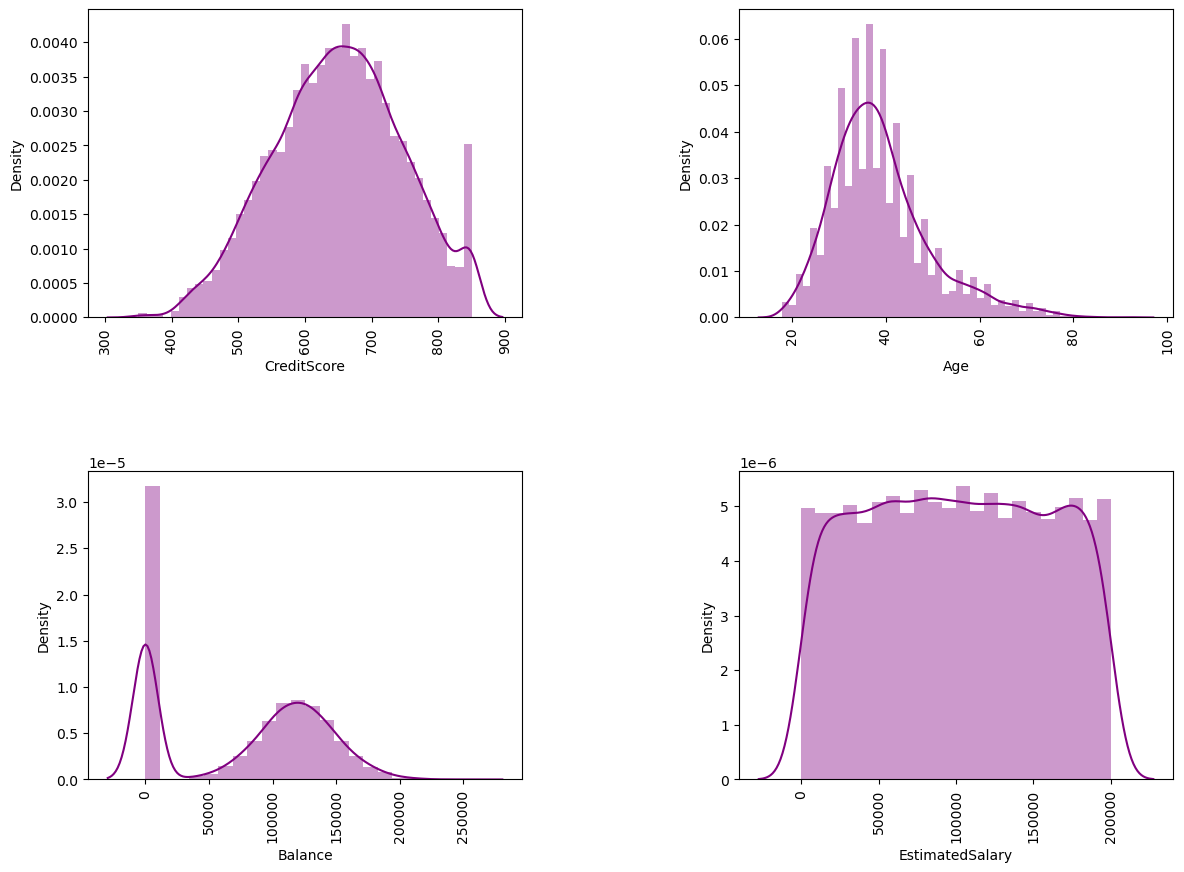

In [21]:
plt.figure(figsize = (14,10))
plt.subplots_adjust(hspace = 0.50, wspace = 0.50)

for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    plt.xticks(rotation=90)
    sns.distplot(df[num_cols[i]], color="purple")
    
plt.show()

##### Insights:
- Credit score of most of the customers lie within the range of 600-700.
- Age analysis shows that most of the customers belong to the category of 30-40 years.
- The maximum number of customers are showing balance within the range of 100000 - 150000 (excluding customers having nil balance)
- Analysis of estimated salary shows the uniform distribution of customers.

## Bivariate analysis

### Between categorical columns and Target variable

##### **Geography**

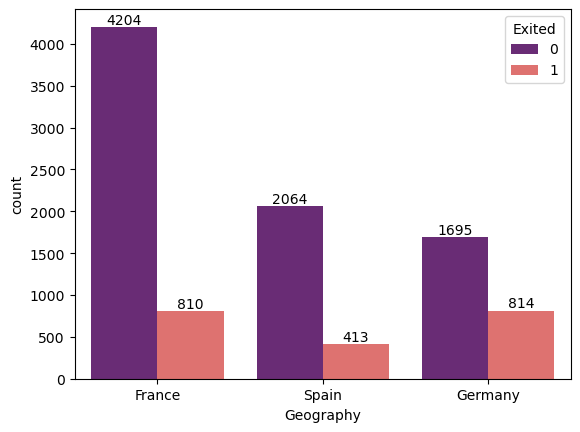

In [22]:
ax = sns.countplot(x = 'Geography', hue = 'Exited', data = df, palette ="magma")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [23]:
# Although the customers from France are more in number than the customers from Germany but 
# the maximum customers who churn belong to Germany, followed by France and Spain.

##### Gender

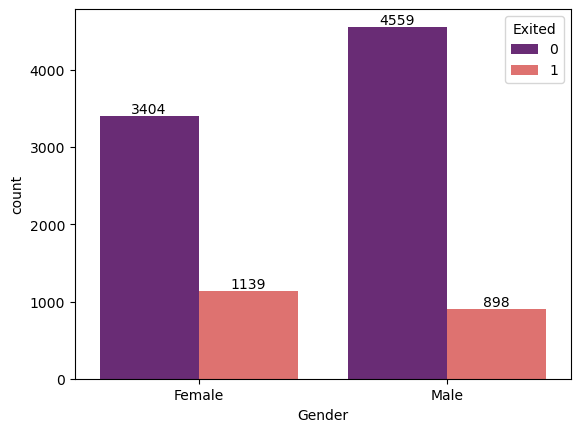

In [24]:
ax = sns.countplot(x = 'Gender', hue = 'Exited', data = df, palette ="magma")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [25]:
# Analysis of Gender also shows the reversed pattern. Even after having more number of customers in male category, 
# it's female category where number of customers who churn are more.

##### NumOfProducts

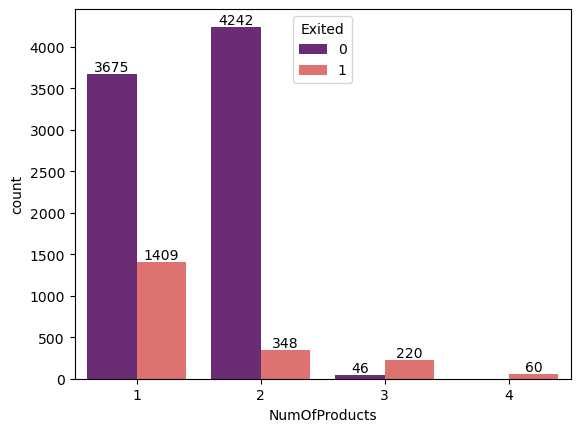

In [26]:
ax = sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = df, palette ="magma")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [27]:
# Customers with single product churn the most.

##### HasCrCard

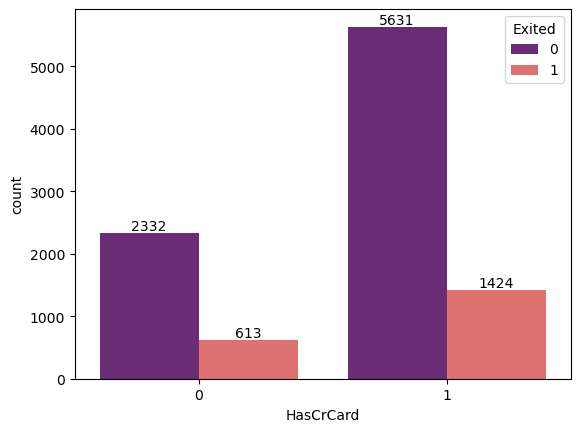

In [28]:
ax = sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df, palette ="magma")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [29]:
# Customers having higher churn rate possess credit card.

##### IsActiveMember

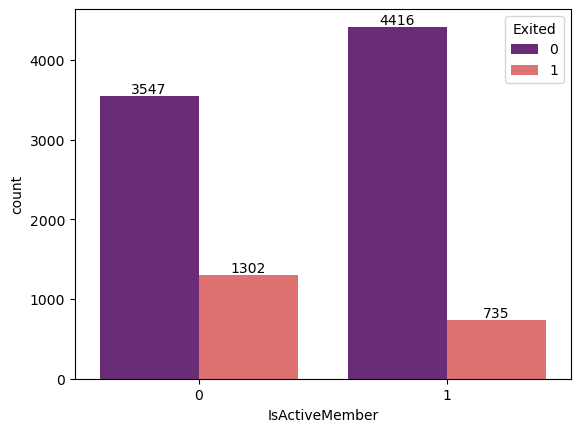

In [30]:
ax = sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df, palette ="magma")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [31]:
# Customers who churn in higher numbers actually non-active members.

##### Tenure

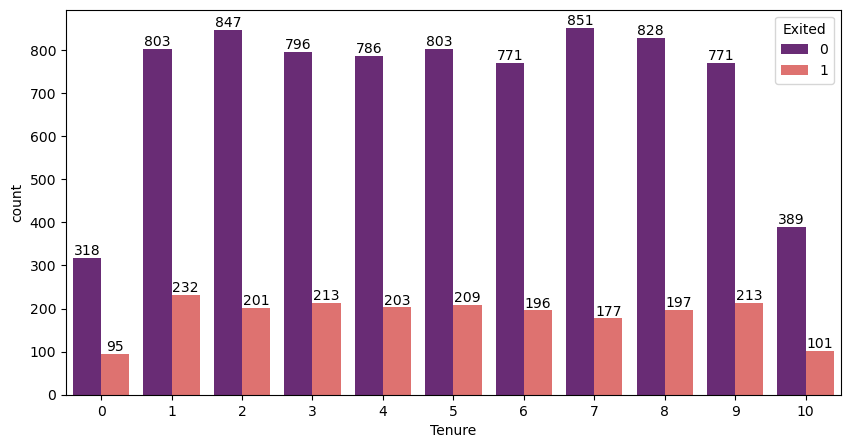

In [32]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'Tenure', hue = 'Exited', data = df, palette ="magma")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [33]:
# Churn rate is following the same pattern as tenure of the customers follows. 

### Between numerical columns and Target variable¶

##### Age

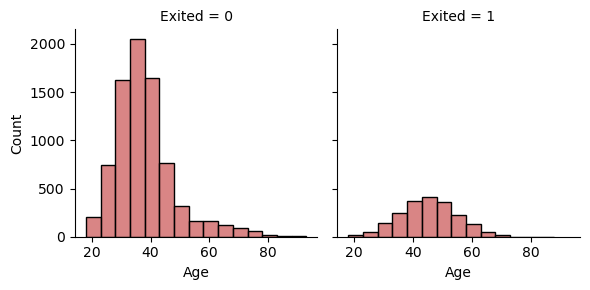

In [34]:
g = sns.FacetGrid(df, col="Exited")
g.map(sns.histplot, "Age", binwidth = 5, color ="indianred")
plt.show()

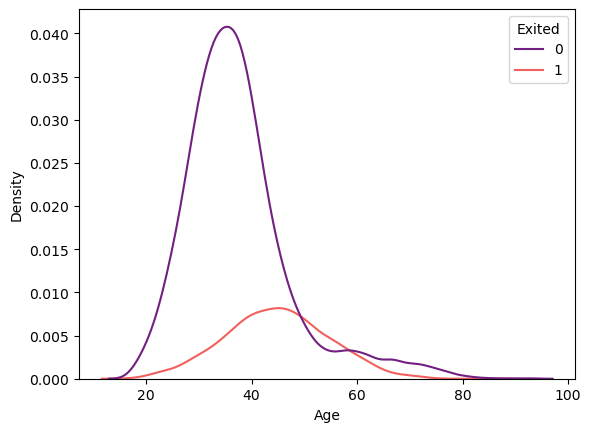

In [35]:
sns.kdeplot(x=df["Age"], hue = df["Exited"], palette="magma")
plt.show()

##### CreditScore

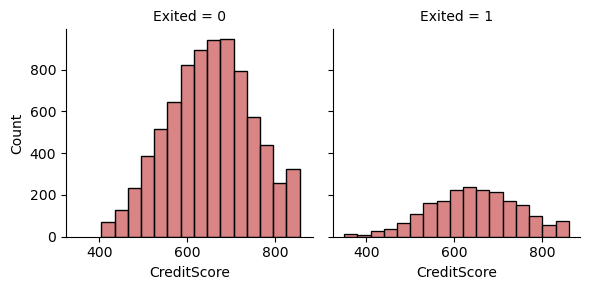

In [36]:
f = sns.FacetGrid(df, col="Exited")
f.map(sns.histplot, "CreditScore", binwidth = 30, color="indianred")
plt.show()

##### Balance

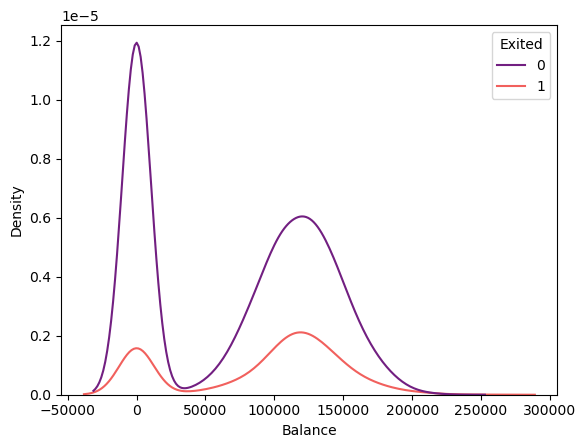

In [37]:
sns.kdeplot(x=df["Balance"], hue = df["Exited"], palette="magma")
plt.show()

##### EstimatedSalary

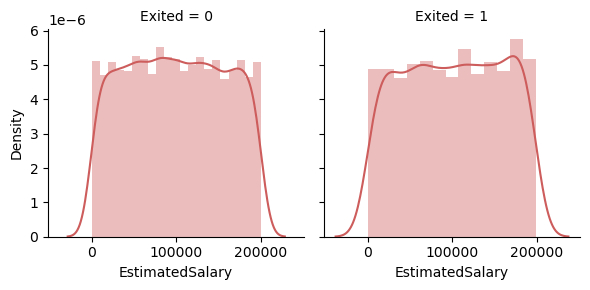

In [38]:
salary = sns.FacetGrid(df, col="Exited")
salary.map(sns.distplot, "EstimatedSalary", color="indianred")
plt.show()

## Multivariate Analysis

### Correlation among features

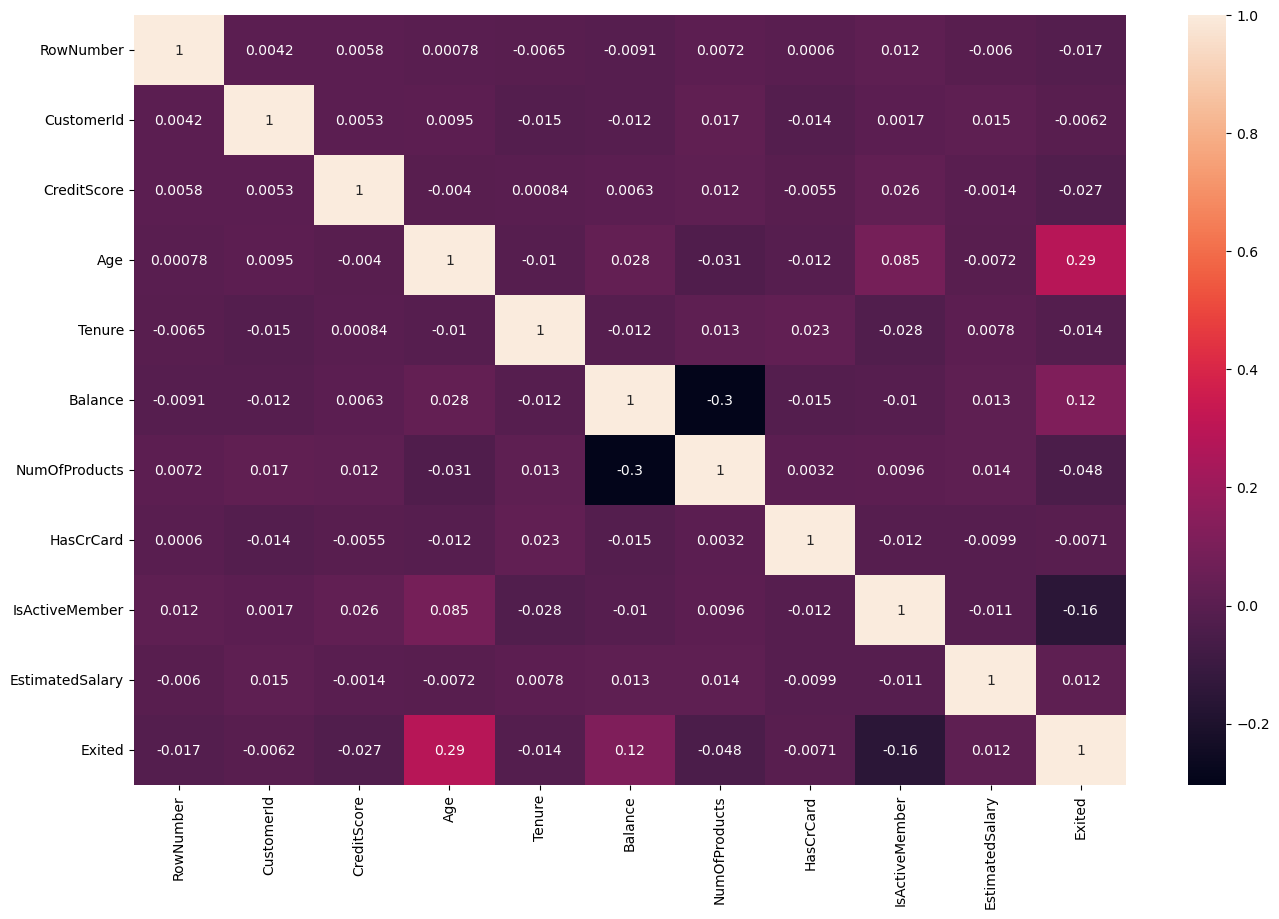

In [39]:
plt.figure(figsize=(16,10),dpi=100)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [40]:
# There is no strong correlation between any of the features and churn rate.
# Moreover, there are no signs of multicollinearity as well.

### Detecting Outliers

In [41]:
num_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

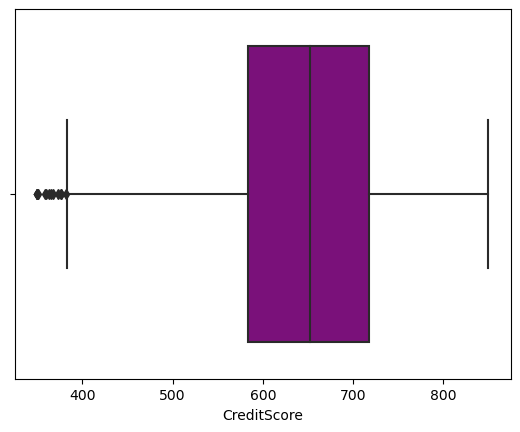

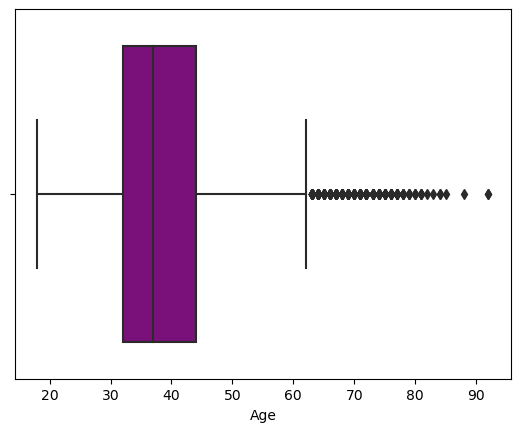

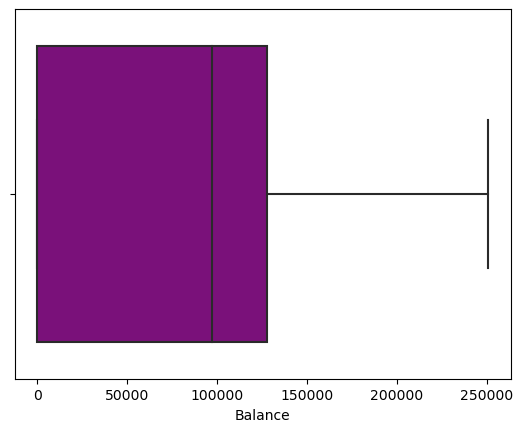

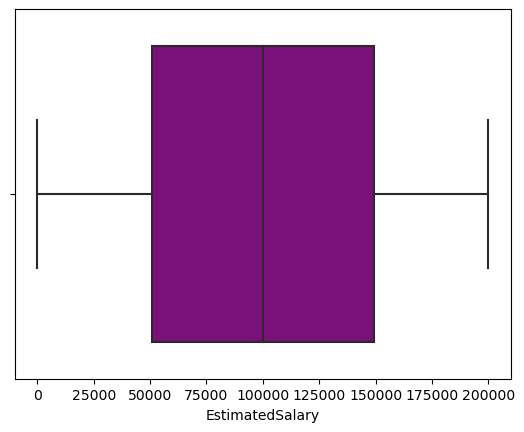

In [42]:
def outliers(col):
    sns.boxplot(data=df, x=col, color='darkmagenta')
    plt.show()
    
for i in range(len(num_cols)):
    outliers(df[num_cols[i]])

In [43]:
# Outliers are present in only two columns: Credit Score and Age which are normal and can be ignored.


<h1><center><b><td>Data Preprocessing</td></b></center></h1>


### Dropping unnecessary features

In [44]:
df = df.drop(columns = ["RowNumber", "CustomerId","Surname"], axis = 1)

In [45]:
# Features like RowNumber, CustomerId and Surname are not going to have any significant impact on our target column. 
# Therefore, it is better to get rid of them.

### Encoding

In [46]:
# Columns like Gender and Geography are categorical in nature. Before proceeding further towards analysis, 
# it is essential to convert them into numeric form.

In [47]:
df = pd.get_dummies(data = df, drop_first=True)

In [48]:
# For this, One-hot encoding is used, leaving all the columns in numeric form.

### Creating a copy of dataset

In [49]:
df1 = df.copy()
# creating a copy of dataset before using the dataset for model building.

In [50]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Splitting the dataset into independent(X) and dependent(Y) variables

In [51]:
x = df1.drop("Exited", axis = 1)
y = df1.Exited

In [52]:
print(x.shape) ## contains independent features
print(y.shape) ## contains single target column

(10000, 11)
(10000,)


### Handling imbalanced dataset

In [53]:
# As we have already seen above that data is highly imbalanced. In this situation, the trained classifier often 
# becomes biased towards the majority label class and tends to miss the minority class. This will be an issue in cases 
# where we want to detect that minority class, for example, whether a person would churn or not (in current scenario). 
# Therefore, it is important to handle such imbalanced dataset.

In [54]:
# Using SMOTE technique to handle imbalanced dataset.

from imblearn.over_sampling import SMOTE
x_bal, y_bal = SMOTE().fit_resample(x,y)

In [55]:
y_bal.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [56]:
# Now, the data has become balanced with equal number of values for each class.

### Splitting the dataset into training and test dataset

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.20, random_state = 11)

### Scaling the training and test dataset separately

In [58]:
# The dataset contain features that are varying in degrees of magnitude and range. Therefore, in order for 
# machine learning models to interpret these features on the same scale, we need to perform feature scaling.

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


<h1><center><b><td>Model Building</td></b></center></h1>


## <i>1. Logistic Regression</i>

In [59]:
# training the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predicting
y_pred = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

# results- Classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1628
           1       0.76      0.80      0.78      1558

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      6335
           1       0.78      0.79      0.78      6405

    accuracy                           0.78     12740
   macro avg       0.78      0.78      0.78     12740
weighted avg       0.78      0.78      0.78     12740



In [60]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[1240  388]
 [ 309 1249]]


In [61]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.7629810629199756
Recall Score : 0.8016688061617459
f1 Score : 0.7818466353677621


## <i>2. Decision Tree</i>

In [62]:
# training the model
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# predicting
y_predd = dt.predict(X_test)
y_predd_train=dt.predict(X_train)

# results - classifcation report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_predd))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_predd_train))


For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1628
           1       0.76      0.80      0.78      1558

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6335
           1       1.00      1.00      1.00      6405

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



In [63]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_predd)
print(matrix)

[[1234  394]
 [ 309 1249]]


In [64]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_predd)}")
print(f"Recall Score : {recall_score(y_test,y_predd)}")
print(f"f1 Score : {f1_score(y_test,y_predd)}")

Precision Score : 0.7601947656725502
Recall Score : 0.8016688061617459
f1 Score : 0.7803811308965948


## <i>3. K Nearest Neighbor</i>

In [65]:
# training the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# predicting
y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)

# results- classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1628
           1       0.80      0.83      0.81      1558

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      6335
           1       0.86      0.89      0.87      6405

    accuracy                           0.87     12740
   macro avg       0.87      0.87      0.87     12740
weighted avg       0.87      0.87      0.87     12740



##### Finding optimal value of k

Text(0, 0.5, 'Error Rate')

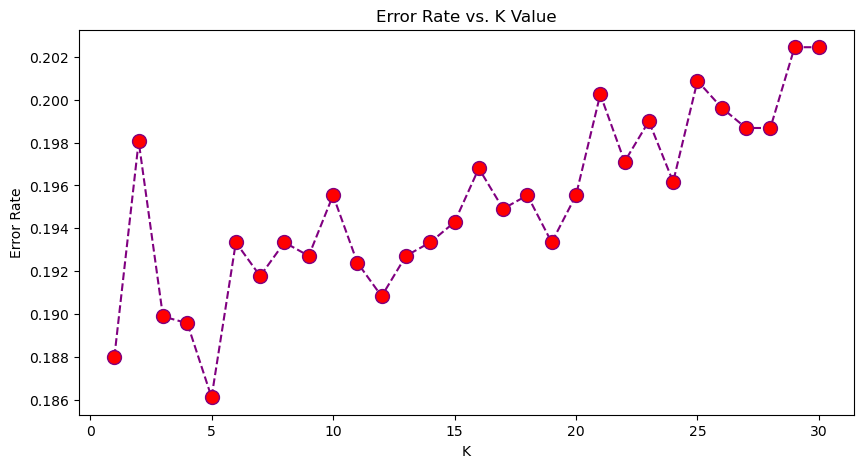

In [66]:
error_rate = []

# predicting on different values of k

for i in range(1,31):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,31),error_rate,color='purple', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')    

In [67]:
# predicting with optimal value of k = 10

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train=knn.predict(X_train)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1628
           1       0.81      0.79      0.80      1558

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      6335
           1       0.86      0.83      0.84      6405

    accuracy                           0.84     12740
   macro avg       0.85      0.84      0.84     12740
weighted avg       0.85      0.84      0.84     12740



In [68]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[1339  289]
 [ 334 1224]]


In [69]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.8089887640449438
Recall Score : 0.785622593068036
f1 Score : 0.7971344838814719


## <i>4. Random Forest</i>

In [70]:
# training the model
rfc = RandomForestClassifier(max_depth = 6,random_state=77)
rfc.fit(X_train,y_train)

#predicting
y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

# results- classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1628
           1       0.81      0.81      0.81      1558

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6335
           1       0.84      0.82      0.83      6405

    accuracy                           0.83     12740
   macro avg       0.83      0.83      0.83     12740
weighted avg       0.83      0.83      0.83     12740



In [71]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[1333  295]
 [ 292 1266]]


In [72]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.8110185778347213
Recall Score : 0.8125802310654685
f1 Score : 0.8117986534145559


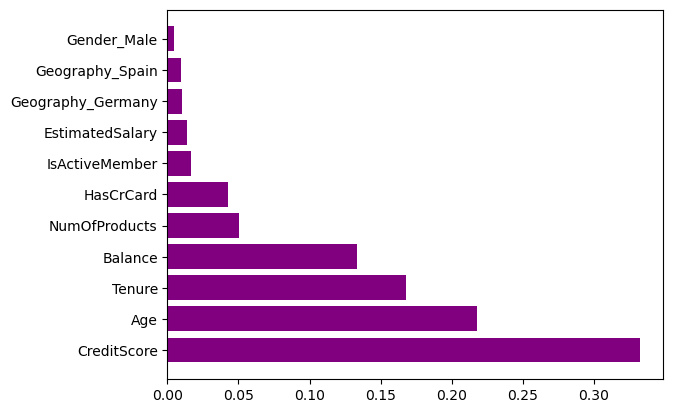

In [73]:
# checking importance of each feature 
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

plt.barh(x_train.columns, feature_scores, color = 'purple')
plt.show()

## <i>5. SVC</i>

In [74]:
svc = SVC(random_state=77)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
y_pred_train = svc.predict(X_train)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1628
           1       0.82      0.83      0.82      1558

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6335
           1       0.85      0.85      0.85      6405

    accuracy                           0.85     12740
   macro avg       0.85      0.85      0.85     12740
weighted avg       0.85      0.85      0.85     12740



In [75]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[1342  286]
 [ 264 1294]]


In [76]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.8189873417721519
Recall Score : 0.8305519897304237
f1 Score : 0.8247291268323773


## <i>6. Gradient Boosting</i>

In [77]:
gdb = GradientBoostingClassifier()
gdb.fit(X_train,y_train)

y_pred = gdb.predict(X_test)
y_pred_train = gdb.predict(X_train)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1628
           1       0.82      0.83      0.83      1558

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      6335
           1       0.85      0.84      0.85      6405

    accuracy                           0.85     12740
   macro avg       0.85      0.85      0.85     12740
weighted avg       0.85      0.85      0.85     12740



In [78]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[1340  288]
 [ 258 1300]]


In [79]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.818639798488665
Recall Score : 0.834403080872914
f1 Score : 0.8264462809917356


## <i>7. Ridge Classifier</i>

In [80]:
rc = RidgeClassifier()
rc.fit(X_train,y_train)

y_pred = rc.predict(X_test)
y_pred_train = rc.predict(X_train)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1628
           1       0.76      0.81      0.79      1558

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6335
           1       0.77      0.80      0.79      6405

    accuracy                           0.78     12740
   macro avg       0.78      0.78      0.78     12740
weighted avg       0.78      0.78      0.78     12740



In [81]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[1226  402]
 [ 291 1267]]


In [82]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.7591372079089275
Recall Score : 0.813222079589217
f1 Score : 0.7852494577006507


## <i>8. XG Boost</i>

In [83]:
xgb= XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))


For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1628
           1       0.83      0.87      0.85      1558

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6335
           1       0.94      0.95      0.95      6405

    accuracy                           0.95     12740
   macro avg       0.95      0.95      0.95     12740
weighted avg       0.95      0.95      0.95     12740



In [84]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[1360  268]
 [ 204 1354]]


In [85]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.8347718865598027
Recall Score : 0.8690629011553274
f1 Score : 0.8515723270440252


## <i>9. Naive Bayes</i>

In [86]:
nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_pred_train = nb.predict(X_train)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1628
           1       0.76      0.81      0.78      1558

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      6335
           1       0.77      0.80      0.78      6405

    accuracy                           0.78     12740
   macro avg       0.78      0.78      0.78     12740
weighted avg       0.78      0.78      0.78     12740



<h1><center><b><td>Cross - Validation</td></b></center></h1>

A technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data.

In [87]:
# Function to find out mean of cross-validation scores

def cv(model):
    acc_scores = cross_val_score(model, X_train, y_train, cv=10)
    Mean_accuracy_score = acc_scores.mean()
    
    prec_scores = cross_val_score(model, X_train, y_train, cv=10, scoring="precision")
    Mean_precision_score = prec_scores.mean()
    
    rec_scores = cross_val_score(model, X_train, y_train, cv=10, scoring="recall")
    Mean_recall_score = rec_scores.mean()
    
    f1_scores = cross_val_score(model, X_train, y_train, cv=10, scoring="f1")
    Mean_f1_score = f1_scores.mean()
    
    return (round(Mean_accuracy_score, 3)), (round(Mean_precision_score,3)), (round(Mean_recall_score,3)), (round(Mean_f1_score,3))

##### 1. Logistic Regression

In [88]:
logreg = LogisticRegression(random_state = 11).fit(X_train, y_train)
lr_accuracy, lr_precision, lr_recall, lr_f1 = cv(logreg)
lr_results = {'Accuracy Score':lr_accuracy, 'Presion_Score':lr_precision, 'Recall_score':lr_recall, 'f1_Score':lr_f1}
print(lr_results)

{'Accuracy Score': 0.781, 'Presion_Score': 0.777, 'Recall_score': 0.791, 'f1_Score': 0.784}


##### 2. Decision Tree

In [89]:
dt = DecisionTreeClassifier(random_state = 11).fit(X_train, y_train)
dt_accuracy, dt_precision, dt_recall, dt_f1 = cv(dt)
dt_results = {'Accuracy Score':dt_accuracy, 'Presion_Score':dt_precision, 'Recall_score':dt_recall, 'f1_Score':dt_f1}
print(dt_results)

{'Accuracy Score': 0.795, 'Presion_Score': 0.786, 'Recall_score': 0.814, 'f1_Score': 0.799}


##### 3. KNN


In [90]:
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_accuracy, knn_precision, knn_recall, knn_f1 = cv(knn)
knn_results = {'Accuracy Score':knn_accuracy, 'Presion_Score':knn_precision, 'Recall_score':knn_recall, 'f1_Score':knn_f1}
print(knn_results)

{'Accuracy Score': 0.809, 'Presion_Score': 0.802, 'Recall_score': 0.824, 'f1_Score': 0.813}


##### 4. Random Forest

In [91]:
rfc = RandomForestClassifier().fit(X_train, y_train)
rfc_accuracy, rfc_precision, rfc_recall, rfc_f1 = cv(rfc)
rfc_results = {'Accuracy Score':rfc_accuracy, 'Presion_Score':rfc_precision, 'Recall_score':rfc_recall, 'f1_Score':rfc_f1}
print(rfc_results)

{'Accuracy Score': 0.861, 'Presion_Score': 0.862, 'Recall_score': 0.863, 'f1_Score': 0.862}


##### 5. Support Vector Machine

In [92]:
svc = SVC().fit(X_train, y_train)
svc_accuracy, svc_precision, svc_recall, svc_f1 = cv(svc)
svc_results = {'Accuracy Score':svc_accuracy, 'Presion_Score':svc_precision, 'Recall_score':svc_recall, 'f1_Score':svc_f1}
print(svc_results)

{'Accuracy Score': 0.832, 'Presion_Score': 0.835, 'Recall_score': 0.83, 'f1_Score': 0.833}


##### 6. Gradient boosting

In [93]:
gdb = GradientBoostingClassifier().fit(X_train, y_train)
gdb_accuracy, gdb_precision, gdb_recall, gdb_f1 = cv(gdb)
gdb_results = {'Accuracy Score':gdb_accuracy, 'Presion_Score':gdb_precision, 'Recall_score':gdb_recall, 'f1_Score':gdb_f1}
print(gdb_results)

{'Accuracy Score': 0.839, 'Presion_Score': 0.843, 'Recall_score': 0.835, 'f1_Score': 0.839}


##### 7. Ridge Classifier

In [94]:
rc = RidgeClassifier().fit(X_train, y_train)
rc_accuracy, rc_precision, rc_recall, rc_f1 = cv(rc)
rc_results = {'Accuracy Score':rc_accuracy, 'Presion_Score':rc_precision, 'Recall_score':rc_recall, 'f1_Score':rc_f1}
print(rc_results)

{'Accuracy Score': 0.779, 'Presion_Score': 0.771, 'Recall_score': 0.797, 'f1_Score': 0.784}


##### 8. XG Boost

In [95]:
xgb = XGBClassifier().fit(X_train, y_train)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = cv(xgb)
xgb_results = {'Accuracy Score':xgb_accuracy, 'Presion_Score':xgb_precision, 'Recall_score':xgb_recall, 'f1_Score':xgb_f1}
print(xgb_results)

{'Accuracy Score': 0.858, 'Presion_Score': 0.853, 'Recall_score': 0.868, 'f1_Score': 0.86}


##### 9. Naive Bayes

In [96]:
nb = GaussianNB().fit(X_train, y_train)
nb_accuracy, nb_precision, nb_recall, nb_f1 = cv(nb)
nb_results = {'Accuracy Score':nb_accuracy, 'Presion_Score':nb_precision, 'Recall_score':nb_recall, 'f1_Score':nb_f1}
print(nb_results)

{'Accuracy Score': 0.779, 'Presion_Score': 0.771, 'Recall_score': 0.797, 'f1_Score': 0.783}


<h1><center><b><td>Performance Evaluation</td></b></center></h1>

In [97]:
data = [['Logistic Regression', lr_accuracy, lr_precision, lr_recall, lr_f1], 
       ['Decision Tree', dt_accuracy, dt_precision, dt_recall, dt_f1],
       ['KNN', knn_accuracy, knn_precision, knn_recall, knn_f1],
       ['Random Forest', rfc_accuracy, rfc_precision, rfc_recall, rfc_f1],
       ['SVM', svc_accuracy, svc_precision, svc_recall, svc_f1],
       ['Gradient boosting', gdb_accuracy, gdb_precision, gdb_recall, gdb_f1],
       ['Ridge Classifier', rc_accuracy, rc_precision, rc_recall, rc_f1],
       ['XG Boost', xgb_accuracy, xgb_precision, xgb_recall, xgb_f1],
       ['Naive Bayes', nb_accuracy, nb_precision, nb_recall, nb_f1]]

model_performance = pd.DataFrame(data, columns=["Models", "Accuracy", "Precision", "Recall", "f1"])

###### Highlighting best scores 

In [98]:
#define function for values greater than 83%
def cond_formatting(x):
    if x > 0.83:
        return 'background-color: lightgreen'
    else:
        return None

#define function for highlighting max values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

#display DataFrame with conditional formatting applied    

model_performance.style.\
    applymap(cond_formatting, subset = ["Accuracy", "Precision", "Recall", "f1"]).\
    apply(highlight_max, subset = ["Accuracy", "Precision", "Recall", "f1"])

,Models,Accuracy,Precision,Recall,f1
0,Logistic Regression,0.781000,0.777000,0.791000,0.784000
1,Decision Tree,0.795000,0.786000,0.814000,0.799000
2,KNN,0.809000,0.802000,0.824000,0.813000
3,Random Forest,0.861000,0.862000,0.863000,0.862000
4,SVM,0.832000,0.835000,0.830000,0.833000
5,Gradient boosting,0.839000,0.843000,0.835000,0.839000
6,Ridge Classifier,0.779000,0.771000,0.797000,0.784000
7,XG Boost,0.858000,0.853000,0.868000,0.860000
8,Naive Bayes,0.779000,0.771000,0.797000,0.783000


**Cells highlighted with:**
- green color shows the values greater than 83% and 
- yellow color shows the max values.

#### Best-Performing Models: 
- XG Boost and Random Forest

<h1><center><b><td>Hyper-Parameter Tuning </td></b></center></h1>

A technique to tweak the parameters of the model for optimal results.

In [100]:
# Function to find out best parameters using Grid Search CV

def classifier(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring = "accuracy")
    grid_search.fit(X_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)    

## 1. Random Forest

In [101]:
#### using random search cv first to narrow down the search of optimal parameters

In [102]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 2000, num = 10)]
# # Number of features to consider at every split
max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
bootstrap = [True, False]
# # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [150, 355, 561, 766, 972, 1177, 1383, 1588, 1794, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [103]:
# # Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                               random_state=33, n_jobs = -1)
# # Fit the random search model
rf_random.fit(X_train,y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1383,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [107]:
# Using random search best parameters to create a range of values to tune using grid search cv

param_grid = {'n_estimators': [150, 700, 1383, 1500],
 'min_samples_split': [1,2,4],
 'min_samples_leaf': [1,2,3,4],
 'max_features': ['sqrt', 'auto'],
 'max_depth': [20,30,50],
 'bootstrap': [True]
              
             }
rf = RandomForestClassifier()
classifier(rf, param_grid)

Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best score: 0.8583987441130299


In [108]:
rfc_tuned = RandomForestClassifier(n_estimators= 150, max_depth = 20, min_samples_split= 2, min_samples_leaf= 1, 
                                   max_features= 'auto', bootstrap= True, random_state=33)
# # fitting
rfc_tuned.fit(X_train,y_train)

rfc_accuracy, rfc_precision, rfc_recall, rfc_f1 = cv(rfc_tuned)
rfc_results = {'Accuracy Score':rfc_accuracy, 'Presion_Score':rfc_precision, 'Recall_score':rfc_recall, 'f1_Score':rfc_f1}
print(rfc_results)

{'Accuracy Score': 0.862, 'Presion_Score': 0.861, 'Recall_score': 0.865, 'f1_Score': 0.863}


##### There is an improvement in the performance of model after tuning.

## 2. XG Boost

In [111]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# # Number of features to consider at every split
learning_rate = [0.1, 0.01, 0.001, 1] 
# # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)

# # Method of selecting samples for training each tree
subsample = [0.3, 0.5, 0.7, 1]
# # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'learning_rate': [0.1, 0.01, 0.001, 1], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'subsample': [0.3, 0.5, 0.7, 1]}


In [112]:
# # Use the random grid to search for best hyperparameters
xgb= XGBClassifier()
# # Random search of parameters, using 3 fold cross validation,search across 100 different combinations
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                               random_state=33, n_jobs = -1)
# # Fit the random search model
xgb_random.fit(X_train,y_train)

xgb_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'subsample': 0.5, 'n_estimators': 800, 'max_depth': 40, 'learning_rate': 0.1}

In [114]:
# # Testing hyper parameters using grid search cv

param_grid = {'n_estimators': [150, 500, 800, 100],
               'learning_rate':[ 0.01, 0.1, 0.3],
               'max_depth': [20,30,40,50],
               'subsample': [0.3,0.5]}

xgb = XGBClassifier()
classifier(xgb, param_grid)

Best parameters: {'learning_rate': 0.1, 'max_depth': 40, 'n_estimators': 150, 'subsample': 0.5}
Best score: 0.8652276295133439


In [115]:
# # training on hyper parameters
xgb_tuned= XGBClassifier(n_estimators = 150, max_depth = 40, learning_rate = 0.1, subsample= 0.5, random_state = 33)
xgb_tuned.fit(X_train,y_train)


xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = cv(xgb_tuned)
xgb_results = {'Accuracy Score':xgb_accuracy, 'Precision_Score':xgb_precision, 'Recall_score':xgb_recall, 'f1_Score':xgb_f1}
print(xgb_results)

{'Accuracy Score': 0.87, 'Precision_Score': 0.865, 'Recall_score': 0.879, 'f1_Score': 0.872}


##### There is an improvement in the performance of model after tuning.

<h1><center><b><td>Performance Evaluation</td></b></center></h1>

<h2><center><b><td>Confusion Matrix: Comparison</td></b></center></h2>

##### 1. Random Forest

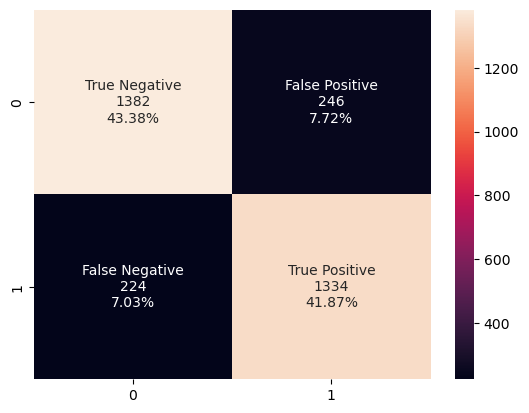

In [120]:
# # Printing Confusion matrix of tuned Random forest model
y_pred_tuned = rfc_tuned.predict(X_test)
rf_matrix = confusion_matrix(y_test,y_pred_tuned)

group_names = ['True Negative' ,'False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in rf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rf_matrix.flatten()/np.sum(rf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# # visualizing in heatmap
sns.heatmap(rf_matrix, annot=labels, fmt='')
plt.show()

##### 2. XG Boost

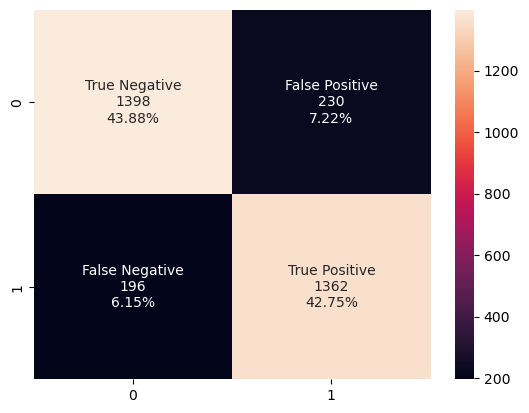

In [121]:
# # Confusion matrix
y_pred_tuned = xgb_tuned.predict(X_test)
xgb_matrix = confusion_matrix(y_test,y_pred_tuned)

group_names = ['True Negative' ,'False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in xgb_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in xgb_matrix.flatten()/np.sum(xgb_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(xgb_matrix, annot=labels, fmt='')
plt.show()

In [122]:
# As seen above, XG Boost has generated less percentage of False Negative and False Positive than Random Forest. 
# Therefore, XG Boost has performed better.

<h2><center><b><td>ROC-AUC Curves: Comparison</td></b></center></h2>

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes.

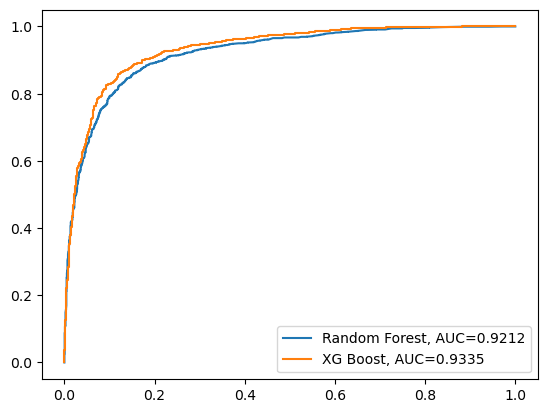

In [123]:
#set up plotting area
plt.figure(0).clf()

#plotting ROC curve of tuned random forest model
y_pred_rf = rfc_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
auc = round(roc_auc_score(y_test, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

# plotting ROC curve of tuned xgboost model
y_pred_xgb = xgb_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
auc = round(roc_auc_score(y_test, y_pred_xgb), 4)
plt.plot(fpr,tpr,label="XG Boost, AUC="+str(auc))

#add legends
plt.legend()
plt.show()

In [1]:
# AUC score of Random Forest is around 0.92. On ther other hand, XG Boost has generated an accuracy score of 0.93. 
# Therefore, XG Boost has performed better.

<h2><center><b><td>Final Performance Evaluation</td></b></center></h2>

In [124]:
final_data = [['Random Forest', rfc_accuracy, rfc_precision, rfc_recall, rfc_f1],
       ['XG Boost', xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]]

final_performance = pd.DataFrame(final_data, columns=["Models", "Accuracy", "Precision", "Recall", "f1"])
final_performance.style.apply(highlight_max, subset = ["Accuracy", "Precision", "Recall", "f1"])

,Models,Accuracy,Precision,Recall,f1
0,Random Forest,0.862000,0.861000,0.865000,0.863000
1,XG Boost,0.870000,0.865000,0.879000,0.872000


**Thus, XG Boost has performed better than other models and can predict correct labels with 87% accuracy.**